# K Nearest Neighbors ie. KNN

## Its more beneficial to import all your libraries in the beginning of your project
### Libraries used here are : 
1. Pandas : To convert our csv/excel file into dataframe for a better understanding.
2. Numpy: in order to use Sklearn we need to transform our dataframe into arrays. We will use numpy also later in this project to find our best 'K'
3. matplotlib.pyplot, matplotlib.ticker, matplotlib nullformatter will be used later in this project for a. Visualizing an important column in our dataframe and its impact on our target. b. identifying our 'K' based on visualizing it. 
4. itertools library will be used to find best K number through fast and complex iteration of k starting from 1 to 10.
5. Sklearn as popular as it is, we will use it to train our model - train/test/split, to preprocess our data - we need to normalize our data and find our data's variance ie distance between each data points.
6. % matplotlib inline is to show our results just after the visualization codes for a faster and better approach.

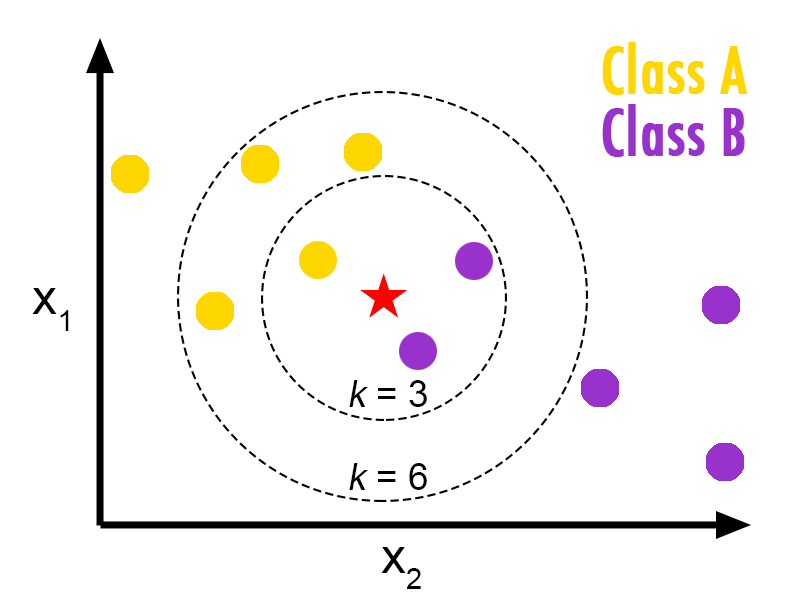

> The above diagram shows our cluster.
## Target of this project is to find the most efficient K no in order to have higher accuracy, in order words, in order to find the correct cluster group our 'red star viz in diagram' belongs to

### I will use comment codes for the coming session

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import itertools
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [51]:
# import your data. In this case its a csv file
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

--2020-07-05 11:03:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: ‘teleCust1000t.csv’

100%[======================================>] 37,048      --.-K/s   in 0.07s   

2020-07-05 11:03:05 (484 KB/s) - ‘teleCust1000t.csv’ saved [37048/37048]



In [52]:
# transform data into dataframe using pandas
df = pd.read_csv('teleCust1000t.csv')

In [53]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [54]:
#Identify our target values
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba1962f9e8>]],
      dtype=object)

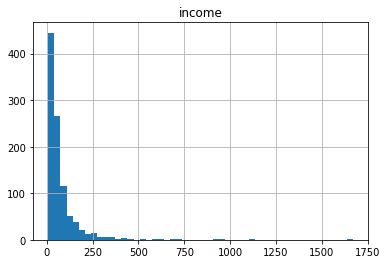

In [55]:
#Visualize our column with highest impact on our target
df.hist(column= 'income', bins = 50)

In [56]:
#how many columns does our dataframe contain
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [57]:
#whats the value of each column in our dataframe. 
#first 5 rows
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside','custcat']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.,
          1.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.,
          4.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.,
          3.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.,
          1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.,
          3.]])

In [58]:
#Value of our target for the first 5 rows
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

In [59]:
#Always preprocess your data. normalizing numbers is important
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [60]:
#train/test split method now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print("train set: ", X_train.shape, y_train.shape)
print("text set: ", X_test.shape, y_test.shape)

train set:  (800, 12) (800,)
text set:  (200, 12) (200,)


In [61]:
#use your sklearn knn library, assume a k number and use your train/test/split data
k = 4
neigh = KNeighborsClassifier(n_neighbors = k). fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [62]:
#predict your targets
yhat = neigh.predict(X_test)
yhat[0:5]

array([3, 1, 1, 2, 4])

In [63]:
#find the accuracy
print("train accuracy is", metrics.accuracy_score(y_train, neigh.predict(X_train)))

train accuracy is 0.82875


In [64]:
#repeat, accuracy is good for test and train?
print("test accuracy is", metrics.accuracy_score(y_test, yhat))

test accuracy is 0.735


In [65]:
#maybe a  better k exist, we cannot manually iterate them. lets use itertools and iterate k=1 to 10

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range (1, Ks):
    neigh  = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765])

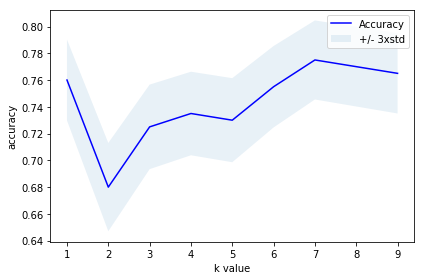

In [68]:
#plot the result, visualize and observe
plt.plot(range(1,Ks), mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc +1 *std_acc, alpha = 0.10)
plt.legend(('Accuracy', '+/- 3xstd'))           
plt.ylabel('accuracy')
plt.xlabel('k value')
plt.tight_layout()
plt.show()

In [70]:
# best value of k is?
print("best accuracy is at value ", mean_acc.max(), "with k = ", mean_acc.argmax()+1)

best accuracy is at value  0.775 with k =  7


# End of session, hope you understood and enjoyed!

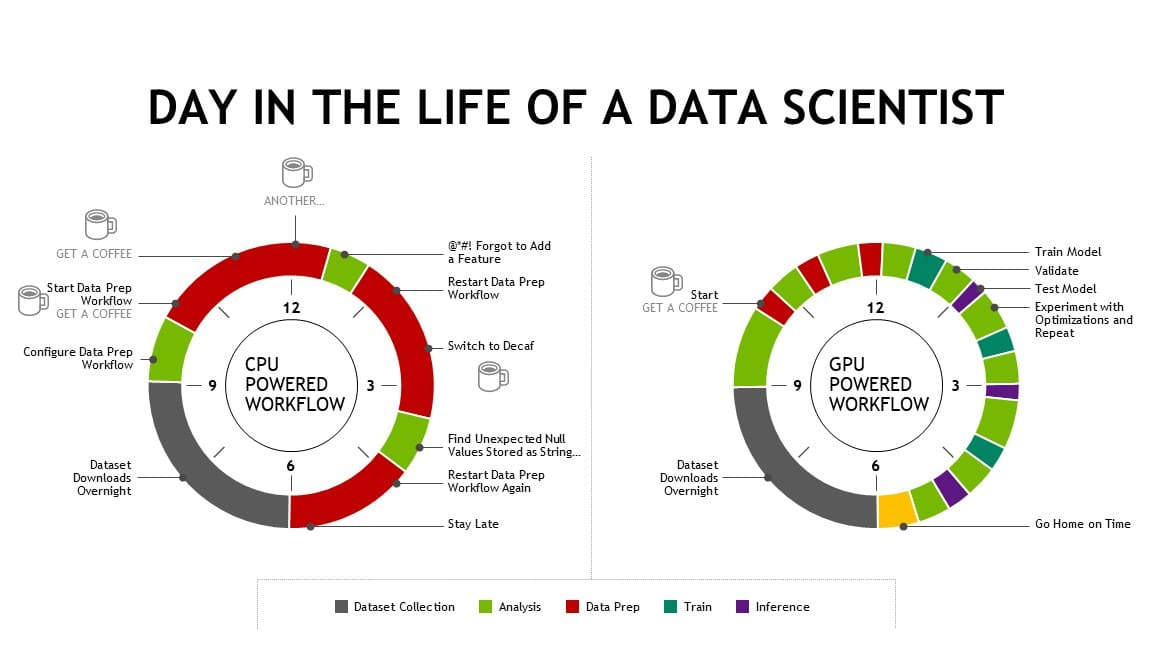